Step 0/10000 completed.
Step 1000/10000 completed.
Step 2000/10000 completed.
Step 3000/10000 completed.
Step 4000/10000 completed.
Step 5000/10000 completed.
Step 6000/10000 completed.
Step 7000/10000 completed.
Step 8000/10000 completed.
Step 9000/10000 completed.


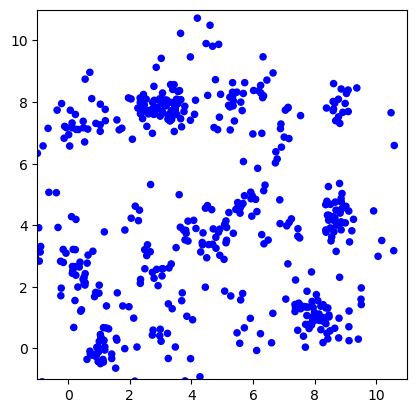

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize the polymer brush system
def initialize_system(grid_size, num_chains, chain_length):
    """
    Initialize the polymer brush system.
    :param grid_size: The size of the square grid (L x L)
    :param num_chains: Number of polymer chains
    :param chain_length: Number of particles in each chain
    :return: A list of polymers, each represented as a chain of (x, y, z) coordinates
    """
    grid_points = [(x, y) for x in range(grid_size) for y in range(grid_size)]
    np.random.shuffle(grid_points)
    grafting_points = grid_points[:num_chains]

    polymers = []
    for x, y in grafting_points:
        chain = [(x, y, z) for z in range(chain_length)]
        polymers.append(chain)
    return polymers

# Step 2: Calculate energy contributions
def calculate_energy(polymers, spring_constant, interaction_constant, r):
    """
    Calculate the total energy of the system.
    :param polymers: List of polymer chains
    :param spring_constant: Spring constant for bonds
    :param interaction_constant: Interaction energy coefficient
    :param r: Size parameter for interactions
    :return: Total energy of the system
    """
    total_energy = 0

    for chain in polymers:
        for i in range(len(chain)):
            x, y, z = chain[i]

            # Spring energy within the chain
            if i > 0:
                x_prev, y_prev, z_prev = chain[i - 1]
                d_ij = np.sqrt((x - x_prev)**2 + (y - y_prev)**2 + (z - z_prev)**2)
                total_energy += 0.5 * spring_constant * d_ij**2

            # Interaction energy with other particles
            for other_chain in polymers:
                for other_particle in other_chain:
                    if other_particle != (x, y, z):
                        x_o, y_o, z_o = other_particle
                        d_ij = np.sqrt((x - x_o)**2 + (y - y_o)**2 + (z - z_o)**2)
                        if d_ij < r:
                            total_energy += interaction_constant * np.cos((np.pi / 2) * (d_ij / r))

    return total_energy

# Step 3: Perform a Monte Carlo simulation step
def monte_carlo_step(polymers, temperature, spring_constant, interaction_constant, r):
    """
    Perform a single Monte Carlo step for the polymer system.
    :param polymers: List of polymer chains
    :param temperature: Simulation temperature
    :param spring_constant: Spring constant for bonds
    :param interaction_constant: Interaction energy coefficient
    :param r: Size parameter for interactions
    :return: Updated polymers after one Monte Carlo step
    """
    # Randomly choose a polymer and a monomer within it
    polymer_idx = np.random.randint(len(polymers))
    monomer_idx = np.random.randint(len(polymers[polymer_idx]))

    # Randomly choose a displacement
    displacement = np.random.uniform(-1, 1, size=3)

    # Store current position and calculate energy
    current_position = np.array(polymers[polymer_idx][monomer_idx])
    current_energy = calculate_energy(polymers, spring_constant, interaction_constant, r)

    # Apply the displacement
    polymers[polymer_idx][monomer_idx] = tuple(current_position + displacement)
    new_energy = calculate_energy(polymers, spring_constant, interaction_constant, r)

    # Decide whether to accept the move
    delta_energy = new_energy - current_energy
    if delta_energy > 0 and np.exp(-delta_energy / temperature) < np.random.rand():
        polymers[polymer_idx][monomer_idx] = tuple(current_position)  # Revert to the old position

    return polymers

# Step 4: Run the simulation
def run_simulation(grid_size, num_chains, chain_length, temperature, interaction_constant, steps):
    """
    Run the Monte Carlo simulation for the polymer brush system.
    :param grid_size: The size of the square grid (L x L)
    :param num_chains: Number of polymer chains
    :param chain_length: Number of particles in each chain
    :param temperature: Simulation temperature
    :param interaction_constant: Interaction energy coefficient
    :param steps: Number of Monte Carlo steps
    :return: Final state of the polymers
    """
    polymers = initialize_system(grid_size, num_chains, chain_length)

    for step in range(steps):
        polymers = monte_carlo_step(polymers, temperature, spring_constant=1, interaction_constant=interaction_constant, r=1)

        # Log progress every 1000 steps
        if step % 1000 == 0:
            print(f"Step {step}/{steps} completed.")

    return polymers

# Step 5: Visualize the final system
def visualize_system(polymers):
    """
    Visualize the polymer brush system.
    :param polymers: List of polymer chains
    """
    fig, ax = plt.subplots()
    for chain in polymers:
        for x, y, z in chain:
            ax.add_patch(plt.Circle((x, y), radius=0.1, color='blue'))

    ax.set_aspect('equal', adjustable='box')
    plt.xlim(-1, 11)
    plt.ylim(-1, 11)
    plt.show()

# Simulation parameters
grid_size = 10
num_chains = 50
chain_length = 10
temperature = 1
interaction_constant = -0.5
steps = 10000

# Run the simulation
final_polymers = run_simulation(grid_size, num_chains, chain_length, temperature, interaction_constant, steps)

# Visualize the final configuration
visualize_system(final_polymers)
